In [16]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py


--2021-07-16 07:17:52--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-07-16 07:17:53 (83.5 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [17]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip

--2021-07-16 07:17:53--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.188.128, 64.233.189.128, 108.177.97.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.188.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip.1’

101_food_classes_10 100%[===================>]   1.51G   124MB/s    in 13s     

2021-07-16 07:18:07 (115 MB/s) - ‘101_food_classes_10_percent.zip.1’ saved [1625420029/1625420029]



In [18]:
from helper_functions import create_tensorboard_callback , plot_loss_curves , unzip_data , compare_historys , walk_through_dir

In [19]:
unzip_data("101_food_classes_10_percent.zip")
train_dir = "101_food_classes_10_percent/train/"
test_dir = "101_food_classes_10_percent/test/"

In [20]:
walk_through_dir("101_food_classes_10_percent")

There are 2 directories and 0 images in '101_food_classes_10_percent'.
There are 101 directories and 0 images in '101_food_classes_10_percent/test'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/bibimbap'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/breakfast_burrito'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/filet_mignon'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/sashimi'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/garlic_bread'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/escargots'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/bruschetta'.
There are 0 directories and 250 images in '101_

In [21]:
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data_all_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir , 
                                                                                label_mode = "categorical" , 
                                                                                image_size = IMG_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir , 
                                                                label_mode ="categorical" , 
                                                                image_size = IMG_SIZE , 
                                                                shuffle = False)

Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


In [22]:
checkpoint_path = "101_food_classes_10_percent_data_model_checkpoint"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path , 
                                                         save_weights_only = True , 
                                                         monitor = "val_accuracy" ,
                                                         save_best_only = True)

In [23]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

In [24]:
data_augmentaion = Sequential([
                               preprocessing.RandomFlip("horizontal") ,
                               preprocessing.RandomRotation(0.2) , 
                               preprocessing.RandomHeight(0.2) , 
                               preprocessing.RandomWidth(0.2) ,
                               preprocessing.RandomZoom(0.2)
] , name ="data_augmentation")

In [25]:
base_model = tf.keras.applications.EfficientNetB1(include_top=False)
base_model.trainable = False

27025408/27018416 [==============================] - 1s 0us/step


In [26]:
inputs = layers.Input(shape=(224 , 224 , 3), name="input_layers")
x= data_augmentaion(inputs)
x= base_model(x , training=False)
x = layers.GlobalAveragePooling2D(name = "global_layer")(x)
outputs = layers.Dense(len(train_data_all_10_percent.class_names) , activation="softmax" , name = "output_layer")(x)
model = tf.keras.Model(inputs , outputs)

In [27]:
model.compile(loss="categorical_crossentropy" , 
              optimizer = tf.keras.optimizers.Adam() , 
              metrics=["accuracy"])

In [28]:
history_all_classes_10_percent = model.fit(train_data_all_10_percent , 
          epochs = 5 , 
          validation_data = test_data , 
          validation_steps=int(0.15* len(test_data)) , 
          callbacks =[checkpoint_callback] )

Epoch 1/5
237/237 [==============================] - 195s 661ms/step - loss: 3.5224 - accuracy: 0.2366 - val_loss: 2.7222 - val_accuracy: 0.3729
Epoch 2/5
237/237 [==============================] - 132s 556ms/step - loss: 2.3889 - accuracy: 0.4512 - val_loss: 2.2904 - val_accuracy: 0.4386
Epoch 3/5
237/237 [==============================] - 121s 511ms/step - loss: 2.0118 - accuracy: 0.5183 - val_loss: 2.1066 - val_accuracy: 0.4743
Epoch 4/5
237/237 [==============================] - 114s 479ms/step - loss: 1.8052 - accuracy: 0.5551 - val_loss: 2.0174 - val_accuracy: 0.4987
Epoch 5/5
237/237 [==============================] - 109s 458ms/step - loss: 1.6453 - accuracy: 0.5967 - val_loss: 1.9400 - val_accuracy: 0.5130


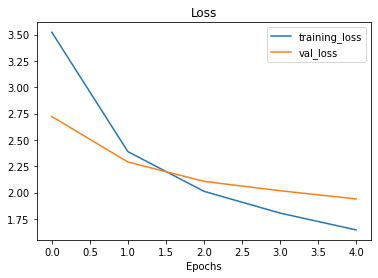

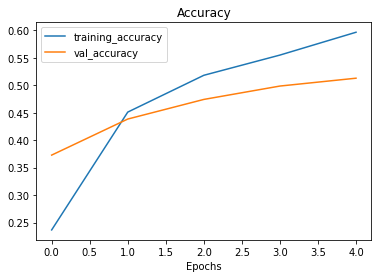

In [29]:
plot_loss_curves(history_all_classes_10_percent)

FINE TUNING


In [ ]:
base_model.trainable = True 

for layer in base_model.layers[:-5]:
  layer.trainable = False

In [ ]:
model.compile(loss="categorical_crossentropy" , 
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001) , 
              metrics=["accuracy"])

In [ ]:
for layer in  model.layers:
  print(layer.name , layer.trainable)

In [33]:
for layer_number, layer in enumerate(model.layers[2].layers):
  print(layer_number, layer.name , layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block1b_dwconv False
18 block1b_bn False
19 block1b_activation False
20 block1b_se_squeeze False
21 block1b_se_reshape False
22 block1b_se_reduce False
23 block1b_se_expand False
24 block1b_se_excite False
25 block1b_project_conv False
26 block1b_project_bn False
27 block1b_drop False
28 block1b_add False
29 block2a_expand_conv False
30 block2a_expand_bn False
31 block2a_expand_activation False
32 block2a_dwconv_pad False
33 block2a_dwconv False
34 block2a_bn False
35 block2a_activation False
36 block2a_se_squeeze False
37 block2a_se_reshape False
38 block2a_se_reduce False
39 block2a_se_ex

In [34]:
fine_tune_epochs = 10 
history_all_classes_10_percent_fine_tune = model.fit(train_data_all_10_percent , 
                                                     epochs = fine_tune_epochs , 
                                                     validation_data = test_data , 
                                                     validation_steps = int(0.15*len(test_data)) , 
                                                     initial_epoch = history_all_classes_10_percent.epoch[-1])

Epoch 5/10
237/237 [==============================] - 122s 464ms/step - loss: 1.4197 - accuracy: 0.6500 - val_loss: 1.8581 - val_accuracy: 0.5299
Epoch 6/10
237/237 [==============================] - 102s 426ms/step - loss: 1.3304 - accuracy: 0.6562 - val_loss: 1.8412 - val_accuracy: 0.5328
Epoch 7/10
237/237 [==============================] - 104s 436ms/step - loss: 1.2276 - accuracy: 0.6799 - val_loss: 1.8558 - val_accuracy: 0.5265
Epoch 8/10
237/237 [==============================] - 97s 407ms/step - loss: 1.1843 - accuracy: 0.6943 - val_loss: 1.8420 - val_accuracy: 0.5299
Epoch 9/10
237/237 [==============================] - 98s 410ms/step - loss: 1.1404 - accuracy: 0.7006 - val_loss: 1.8167 - val_accuracy: 0.5347
Epoch 10/10
237/237 [==============================] - 94s 394ms/step - loss: 1.1025 - accuracy: 0.7057 - val_loss: 1.8075 - val_accuracy: 0.5392


In [35]:
feature_extraction_results = model.evaluate(test_data)
feature_extraction_results

790/790 [==============================] - 177s 223ms/step - loss: 1.6009 - accuracy: 0.5796


[1.6008683443069458, 0.5795643329620361]

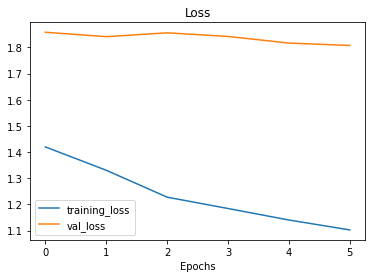

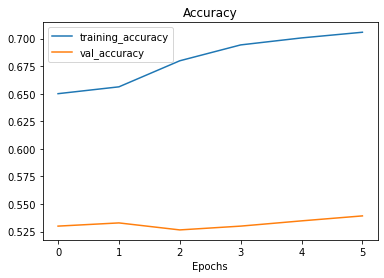

In [36]:
plot_loss_curves(history_all_classes_10_percent_fine_tune)

In [37]:
all_classes_10_percent_fine_tune_results = model.evaluate(test_data)
all_classes_10_percent_fine_tune_results

790/790 [==============================] - 176s 222ms/step - loss: 1.6009 - accuracy: 0.5796


[1.6008683443069458, 0.5795643329620361]

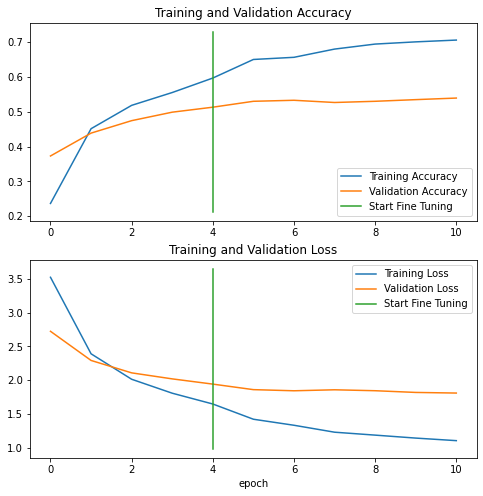

In [38]:
compare_historys(original_history = history_all_classes_10_percent , 
                 new_history = history_all_classes_10_percent_fine_tune , 
                 initial_epochs = 5)